# Example 020: Undulator Spectrum

In this example the spectrum from an undulator is calculate for a zero-emittance electron beam.

In [1]:
# This has nothing to do with OSCARS, but it puts the matplotlib plots inline in the notebook
%matplotlib inline

# Import the OSCARS SR module
import oscars.sr

# Import basic plot utilities (matplotlib).  You don't need these to run OSCARS, but it's used here for basic plots
from oscars.plots_mpl import *

OSCARS v1.31.05 - Open Source Code for Advanced Radiation Simulation
Brookhaven National Laboratory, Upton NY, USA
http://oscars.bnl.gov
oscars@bnl.gov


In [2]:
# Create a new OSCARS object
osr = oscars.sr.sr()

## Create the undulator field

Here we create the undulator field.  Here *bfield* represents maximum magnetic field [$B_x, B_y, B_z$].  The *period* is also in vector form which allows you to orient the axis of the undulator in any arbitrary direction.  The number of periods is given by *nperiods*.  This is the number of FULL periods.  A terminating field of 1 period length is added to each side in addition to *nperiods*.  Typically clear_magnetic_fields() is called before adding a field in notebooks only to save time when making changes and rerunning sections of the code so it is not strictly necessary.

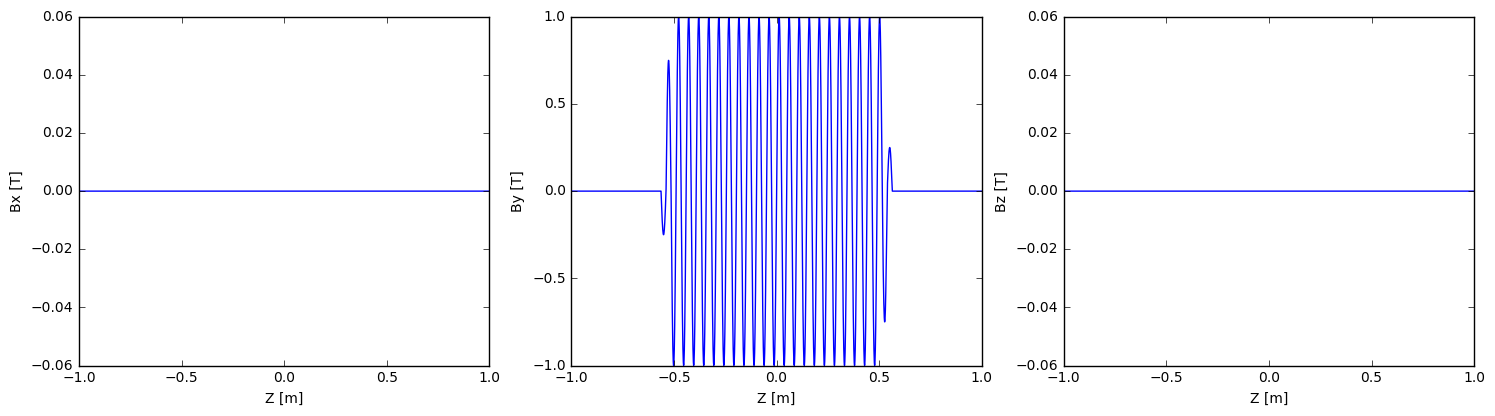

In [3]:
# Clear any existing fields (just good habit in notebook style) and add an undulator field
osr.clear_bfields()
osr.add_bfield_undulator(bfield=[0, 1, 0], period=[0, 0, 0.049], nperiods=21)

# Just to check the field that we added seems visually correct
plot_bfield(osr, -1, 1)

## Add a particle beam

Now we add a simple particle beam.  There are a few important things to understand about the setup of magnetic fields and particle beams, namely positions and times.  You can define the initial position and time of a particle beam to be anywhere you like.  The default initial time for a beam is t=0.  You must specify the initial position, which for this simple example it is recommended to be *before* the undulator (in the plot at z=-1 [m] is a good choice if the particle beam is defined to be going in the +z direction as is done below.

One must specify ctstartstop.  This is the start and stop time of the calculation.  In this example we will start the calculation at t=0 and go to t=2 (given in units of ct) since the beam is relativistic.  In this example you can specify the start time as less than 0 which is useful if you want to propogate the particle backwars in time.  This is useful for instance if you have a bending magnet before the undulator that you wish to include.

clear_particle_beams() is called, again for convenience, but it is not necessary.

In [4]:
# Setup beam similar to NSLSII
osr.clear_particle_beams()
osr.set_particle_beam(type='electron',
                      name='beam_0',
                      x0=[0, 0, -1],
                      d0=[0, 0, 1],
                      energy_GeV=3,
                      current=0.500
                     )

# Set the start and stop times for the calculation
osr.set_ctstartstop(0, 2)

## Calculate Trajectory

Now we calculate the trajectory and plot it.  It is enough to call calculate_trajectory().  If you are doing other calculations (flux, spectra, power density) it is not necesary to call this since it is called internally.

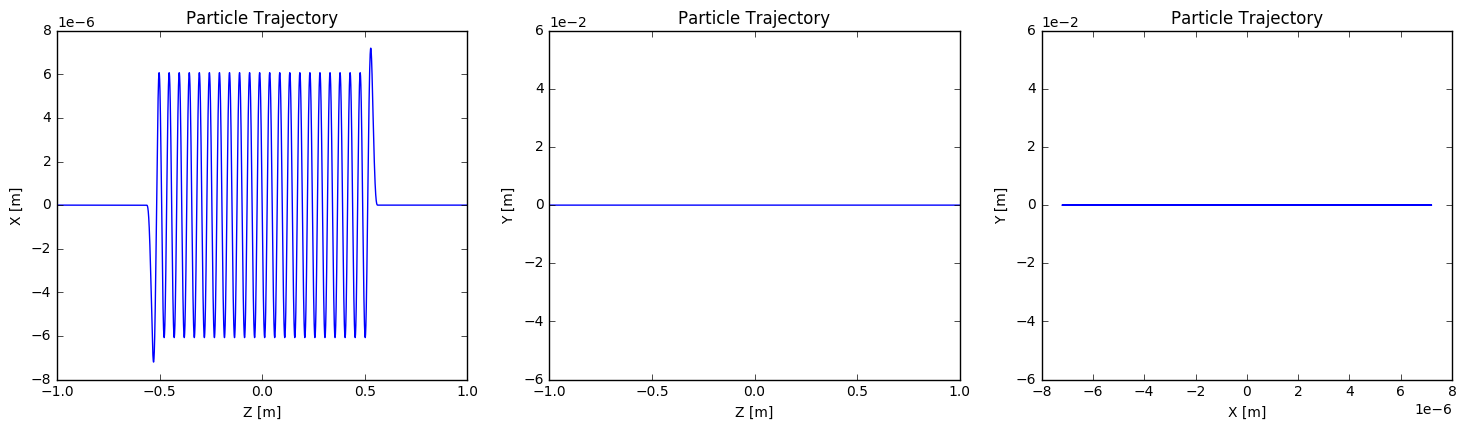

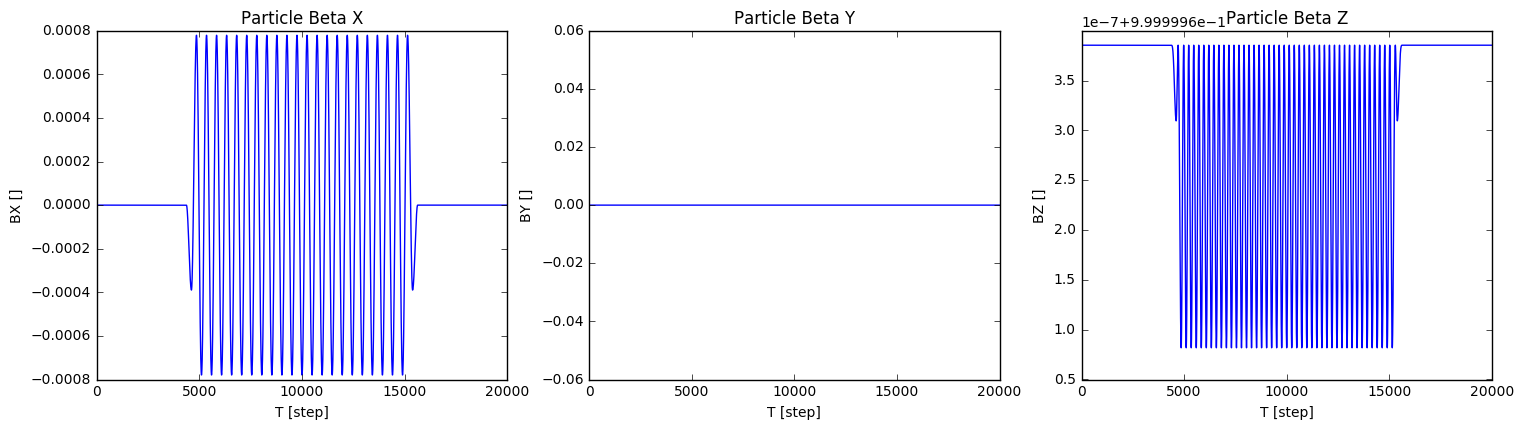

In [5]:
# Run the particle trajectory calculation
trajectory = osr.calculate_trajectory()

# Plot the trajectory position and velocity
plot_trajectory_position(trajectory)
plot_trajectory_velocity(trajectory)

## Calculate Spectrum

Calculate the spectrum in a given range with the given number of points equally spaced (not a requirement).

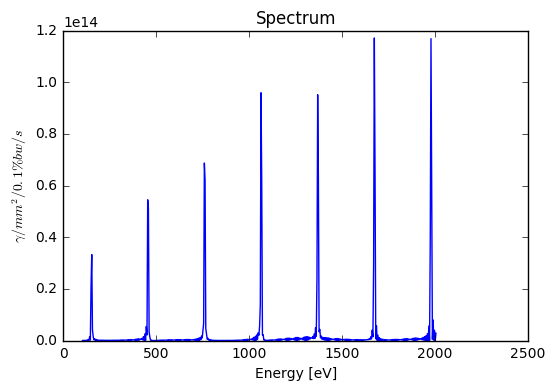

In [6]:
# Calculate spectrum
spectrum = osr.calculate_spectrum(obs=[0, 0, 30], energy_range_eV=[100, 2000], npoints=500)
plot_spectrum(spectrum)

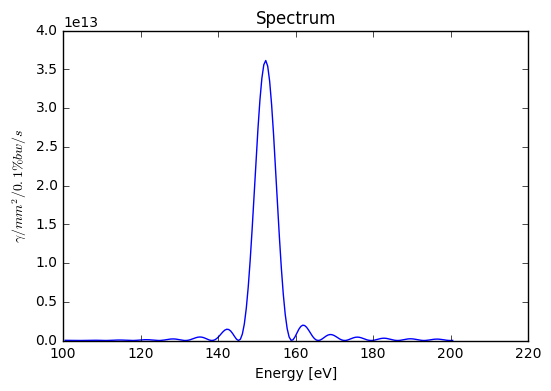

In [7]:
# Calculate spectrum zoom
spectrum = osr.calculate_spectrum(obs=[0, 0, 30], energy_range_eV=[100, 200], npoints=200)
plot_spectrum(spectrum)

In [8]:
# If you want to convert the notebook to HTML
import os
os.system('jupyter nbconvert --to html Example_022_UndulatorSpectrum.ipynb')

0